n1 = 1, n2 = 1:
	 Run = 1
	 Epoch (early stopping) = 65
	 Validation Loss = 0.6895967830354958
	 Training Loss = 0.6892709741394527
n1 = 1, n2 = 1:
	 Run = 2
	 Epoch (early stopping) = 55
	 Validation Loss = 0.6895930280571754
	 Training Loss = 0.6892674461015283
n1 = 1, n2 = 1:
	 Run = 3
	 Epoch (early stopping) = 118
	 Validation Loss = 0.6895917947578903
	 Training Loss = 0.689265405651643
n1 = 1, n2 = 2:
	 Run = 1
	 Epoch (early stopping) = 128
	 Validation Loss = 0.6895913637762057
	 Training Loss = 0.6892647542842448
n1 = 1, n2 = 2:
	 Run = 2
	 Epoch (early stopping) = 89
	 Validation Loss = 0.6895912422385956
	 Training Loss = 0.6892641231236454
n1 = 1, n2 = 2:
	 Run = 3
	 Epoch (early stopping) = 67
	 Validation Loss = 0.689594829769509
	 Training Loss = 0.6892720984268356
n1 = 1, n2 = 3:
	 Run = 1
	 Epoch (early stopping) = 72
	 Validation Loss = 0.6895912436335749
	 Training Loss = 0.6892643182767586
n1 = 1, n2 = 3:
	 Run = 2
	 Epoch (early stopping) = 75
	 Validation Loss = 

n1 = 4, n2 = 4:
	 Run = 1
	 Epoch (early stopping) = 56
	 Validation Loss = 0.6895926671261201
	 Training Loss = 0.6892631858795379
n1 = 4, n2 = 4:
	 Run = 2
	 Epoch (early stopping) = 69
	 Validation Loss = 0.6895919005009412
	 Training Loss = 0.6892652893460033
n1 = 4, n2 = 4:
	 Run = 3
	 Epoch (early stopping) = 62
	 Validation Loss = 0.6895914574520704
	 Training Loss = 0.6892648003703334
n1 = 5, n2 = 1:
	 Run = 1
	 Epoch (early stopping) = 58
	 Validation Loss = 0.6895915310061194
	 Training Loss = 0.6892645419218923
n1 = 5, n2 = 1:
	 Run = 2
	 Epoch (early stopping) = 85
	 Validation Loss = 0.6895960768063133
	 Training Loss = 0.6892702958801704
n1 = 5, n2 = 1:
	 Run = 3
	 Epoch (early stopping) = 75
	 Validation Loss = 0.6895946035764786
	 Training Loss = 0.6892697266165555
n1 = 5, n2 = 2:
	 Run = 1
	 Epoch (early stopping) = 70
	 Validation Loss = 0.6895920763620983
	 Training Loss = 0.6892669575214866
n1 = 5, n2 = 2:
	 Run = 2
	 Epoch (early stopping) = 76
	 Validation Loss = 

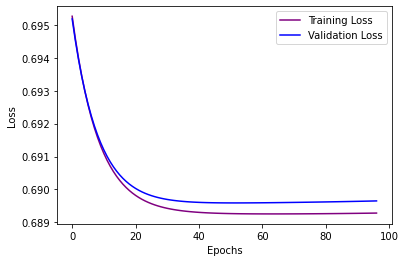

In [5]:
# Hritheekka Chinnakonda, chinnakh, 400292782

# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Neural Network Classifier class
class Neural_Network_Classifier:
    # initializing all necessary values and variables
    def __init__(self):
        self.hidden_L1_weights = None
        self.hidden_L2_weights = None
        self.output_layer_weights = None
        self.learning_rate = 0.005
        self.epochs = 1000
        self.early_stopping_patience = 45
        self.max_hidden_units = 8 # maximum of 8 hidden layers
        
    # initializing the weights for hidden layer 1, hidden layer 2 and the output layer
    def weights(self, num_input_units, n1, n2):
        
        # initializing limits for weights, based on the number of input units
        hidden_limit = np.sqrt(1 / (num_input_units + n1)) # limits for the hidden layers
        outer_limit = np.sqrt(1 / (n1 + n2)) # limits between 2 hidden layers and output layer
        
        # generate random weights using a uniform distribution within limits set above 
        self.hidden_L1_weights = np.random.uniform(-hidden_limit, hidden_limit, size=(num_input_units, n1))
        self.hidden_L2_weights = np.random.uniform(-outer_limit, outer_limit, size=(n1, n2))
        self.output_layer_weights = np.random.uniform(-outer_limit, outer_limit, size=(n2, 1))
    
    
    # logistic sigmoid activation function for output and hidden layers
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # derivative of logistic sigmoid activation function for backpropagation 
    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))
    
     # computing cross entropy loss 
    def cross_entropy(self, y_true, output):
        cross_entropy_loss = -np.mean(y_true * np.log(output) + (1 - y_true) * np.log(1 - output))
        return cross_entropy_loss

    # forward propagation     
    def forward_propagation(self, X):
        
        # computing the outputs using the sigmoid activation function and weights
        hidden_L1_output = self.sigmoid(np.dot(X, self.hidden_L1_weights))
        hidden_L2_output = self.sigmoid(np.dot(hidden_L1_output, self.hidden_L2_weights))
        output_layer_out = self.sigmoid(np.dot(hidden_L2_output, self.output_layer_weights))
        return hidden_L1_output, hidden_L2_output, output_layer_out


    # backpropagation 
    def backpropagation(self, X_train, y_train):
        
        # receiving output of each layer from forward propagation function
        hidden_L1_output, hidden_L2_output, output_layer_out = self.forward_propagation(X_train)

        # calculating error at ouput layer, error-weighted derivative using activation function
        output_error = y_train.reshape(-1, 1) - output_layer_out
        output_delta = output_error * self.sigmoid_derivative(output_layer_out)

        # error is backpropagated from the output layer to the hidden layers
        # calculating error at hidden layer 2, error-weighted derivative using activation function
        hidden_L2_error = output_delta.dot(self.output_layer_weights.T)
        hidden_L2_delta = hidden_L2_error * self.sigmoid_derivative(hidden_L2_output)

        # calculating error at hidden layer 1, error-weighted derivative using activation function
        hidden_L1_error = hidden_L2_delta.dot(self.hidden_L2_weights.T)
        hidden_L1_delta = hidden_L1_error * self.sigmoid_derivative(hidden_L1_output)
        
        # updating the weights of each layer, using gradient descent 
        self.output_layer_weights = self.output_layer_weights + (hidden_L2_output.T.dot(output_delta) * self.learning_rate)
        self.hidden_L2_weights = self.hidden_L2_weights + (hidden_L1_output.T.dot(hidden_L2_delta) * self.learning_rate)
        self.hidden_L1_weights = self.hidden_L1_weights + (X_train.T.dot(hidden_L1_delta) * self.learning_rate)
    
    def train_classifier(self, X_train, y_train, X_validation, y_validation):
        
        # initializing necessary values and lists
        training_loss_values = []
        validation_loss_values = []
        best_validation_loss = float('inf')
        patience = 0 # tracking the number of epochs with no improvements in validation loss

        # iterating through all epochs
        for epoch in range(self.epochs):
            
            #performs back propagation to update weights based on training data
            self.backpropagation(X_train, y_train)
            
            #performs forward propagation to get outputs of each layer
            hidden_L1_output_val, hidden_L2_output_val, output_val = self.forward_propagation(X_validation)

            # calculating training loss and appending it to list
            training_loss = self.cross_entropy(y_train, self.forward_propagation(X_train)[-1])
            training_loss_values.append(training_loss)

            # calculating validation loss and appending it to list
            validation_loss = self.cross_entropy(y_validation, output_val)
            validation_loss_values.append(validation_loss)

            # early stopping, comparing current validation loss with the best stored validation loss
            if best_validation_loss > validation_loss:
                
                patience = 0 # reset to 0
                
                # updates validation and training loss
                best_validation_loss = validation_loss
                best_training_loss = training_loss
                
                # updates  weights
                hidden_L1_weights =  self.hidden_L1_weights.copy()
                hidden_L2_weights =  self.hidden_L2_weights.copy()
                output_layer_weights = self.output_layer_weights.copy()
                        
            else:
                patience += 1 # increment counter when validation loss doesnt improve 
                
                # break loop if condition is met 
                if self.early_stopping_patience <= patience :
                    break

        return epoch, hidden_L1_weights, hidden_L2_weights, output_layer_weights, best_training_loss, best_validation_loss, training_loss_values, validation_loss_values

    # evaluating network performance,calculates misclassification error 
    def test_neural_network(self, X, y,  hidden_L1_weights, hidden_L2_weights, output_layer_weights):
        # layer outputs from forward propagation error
        hidden_L1_output, hidden_L2_output, output = self.forward_propagation(X)
        # assigning classes (greater than 0.5 are considered as class 1, less than or equal to 0.5, class 0)
        test_predictions = (output > 0.5).astype(int) # storing class prediction
        misclassification_error = np.mean(test_predictions.flatten() != y) # calculating mean error, boolean array (predictions match/not matching true labels)
        return misclassification_error
    
def main():
    
    #calling Neural Network Classifier
    neural_network = Neural_Network_Classifier()

    # Loading the dataset
    data = np.loadtxt('data_banknote_authentication.txt', delimiter=',')
    X = data[:, :-1] # features
    y = data[:, -1] # labels
    
    # initializing and assigning values
    optimal_n1 = None
    optimal_n2 = None
    optimal_weight_L1 = None
    optimal_weight_L2 = None
    optimal_weight_L3 = None
    optimal_validation_loss = 10000000 # large number
    optimal_misclassification_error = 10000000 # large number
    random_seed = 2782 # last 4 digits of student number, random seed
    np.random.seed(random_seed)
    iterations = 3 # at least 3 iterations starting with different initial weights
    
    # splitting training, test and validation set (60%, 20%, 20% respectively)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.4, random_state=random_seed)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_validation = scaler.transform(X_validation)
    X_test = scaler.transform(X_test)

    for n1 in range(1, neural_network.max_hidden_units):
        for n2 in range(1, neural_network.max_hidden_units - n1 + 1):
            # Resetting loss value lists
            training_loss_values = []
            validation_loss_values = []

            optimal_weights_list_L1 = []
            optimal_weights_list_L2 = []
            optimal_weights_list_L3 = []
            best_training_loss_list = []
            best_validation_loss_list = []
            misclassification_error_test_list = []

            for run in range(iterations):
                neural_network.weights(X_train.shape[1], n1, n2)
                epoch, hidden_L1_weights, hidden_L2_weights, output_layer_weights, best_training_loss, best_validation_loss, training_loss_values, validation_loss_values = neural_network.train_classifier(X_train, y_train, X_validation, y_validation)
                misclassification_error_test = neural_network.test_neural_network(X_test, y_test,  hidden_L1_weights, hidden_L2_weights, output_layer_weights)

                optimal_weights_list_L1.append(hidden_L1_weights)
                optimal_weights_list_L2.append(hidden_L2_weights)
                optimal_weights_list_L3.append(output_layer_weights)
                best_training_loss_list.append(best_training_loss)
                best_validation_loss_list.append(best_validation_loss)
                misclassification_error_test_list.append(misclassification_error_test)

                print(f'n1 = {n1}, n2 = {n2}:\n\t Run = {run + 1}\n\t Epoch (early stopping) = {epoch}\n\t Validation Loss = {best_validation_loss}\n\t Training Loss = {best_training_loss}')

                best_index = np.argmin(best_validation_loss_list)
                if best_validation_loss_list[best_index] < optimal_validation_loss:
                    optimal_n1 = n1
                    optimal_n2 = n2
                    optimal_weight_L1 = optimal_weights_list_L1[best_index] 
                    optimal_weight_L2 = optimal_weights_list_L2[best_index] 
                    optimal_weight_L3 = optimal_weights_list_L3[best_index] 
                    optimal_validation_loss = best_validation_loss_list[best_index]
                    optimal_misclassification_error = misclassification_error_test_list[best_index]
    
                
    # getting the final best model errors, using the optimal values
    final_model_misclassification_error_test = neural_network.test_neural_network(X_test, y_test,  hidden_L1_weights, hidden_L2_weights, output_layer_weights)
    final_model_misclassification_error_train = neural_network.test_neural_network(X_train, y_train,  hidden_L1_weights, hidden_L2_weights, output_layer_weights)
    final_model_misclassification_error_validation = neural_network.test_neural_network(X_validation, y_validation,  hidden_L1_weights, hidden_L2_weights, output_layer_weights)
    
    # final model errors and weights
    print(f'\nTHE FINAL MODEL (ERRORS and WEIGHTS):n1={optimal_n1}, n2={optimal_n2}\n')
    print(f'\tTraining Loss: {best_training_loss_list[best_index]}')
    print(f'\tValidation Loss: {optimal_validation_loss}\n')
    print(f'\tTest Misclassification Error: {final_model_misclassification_error_test}')
    print(f'\tTraining Misclassification Error: {final_model_misclassification_error_train}')
    print(f'\tValidation Misclassification Error: {final_model_misclassification_error_validation}\n')
    print(f'Hidden Layer 1 Weights: {optimal_weight_L1}\n')
    print(f'Hidden Layer 2 Weights: {optimal_weight_L2}\n')
    print(f'Output Layer Weights: {optimal_weight_L3}\n')
    
    
    # plotting learning curve
    plt.plot(training_loss_values, label='Training Loss', color='purple')
    plt.plot(validation_loss_values, label='Validation Loss', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()
